[View in Colaboratory](https://colab.research.google.com/github/kishangooner/feature_selection_project/blob/master/Campaign.ipynb)

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score , recall_score , roc_auc_score

bank = pd.read_csv("https://raw.githubusercontent.com/chirag-shinde/trydjango/master/bank-additional-full.csv", delimiter=';')

In [0]:
def split_num_obj(df):
    df_num = df.select_dtypes(exclude=object)
    df_obj = df.select_dtypes(include=object)
    return df_num,df_obj

In [0]:
def convert_to_cat(df):
    for col in df.columns:
        if col != 'education':
            df.loc[:,col] = df[col].astype('category', ordered=False)
    return df

In [0]:
def cnv_to_num(df):
    for col in df.columns:
        df.loc[:,col] = df[col].cat.codes
    return df

In [5]:
bank_num, bank_obj = split_num_obj(bank)
bank_cat = convert_to_cat(bank_obj)
bank_cat["education"] = bank_cat["education"].astype("category",
                categories=["unknown", "primary", "secondary","tertiary"], 
                ordered=True)
bank_cat = cnv_to_num(bank_cat)
bank[bank_cat.columns] = bank_cat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-pac

In [0]:
bank[bank_cat.columns] = bank_cat

In [7]:
bank.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object

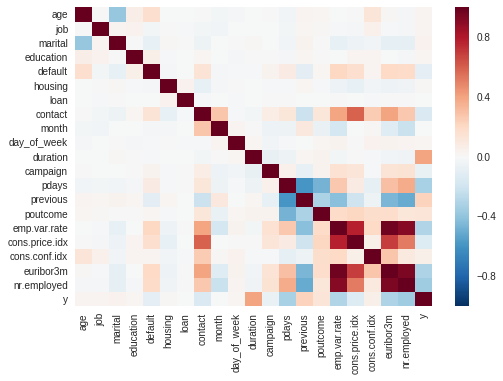

In [8]:
import seaborn as sns
sns.heatmap(bank.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


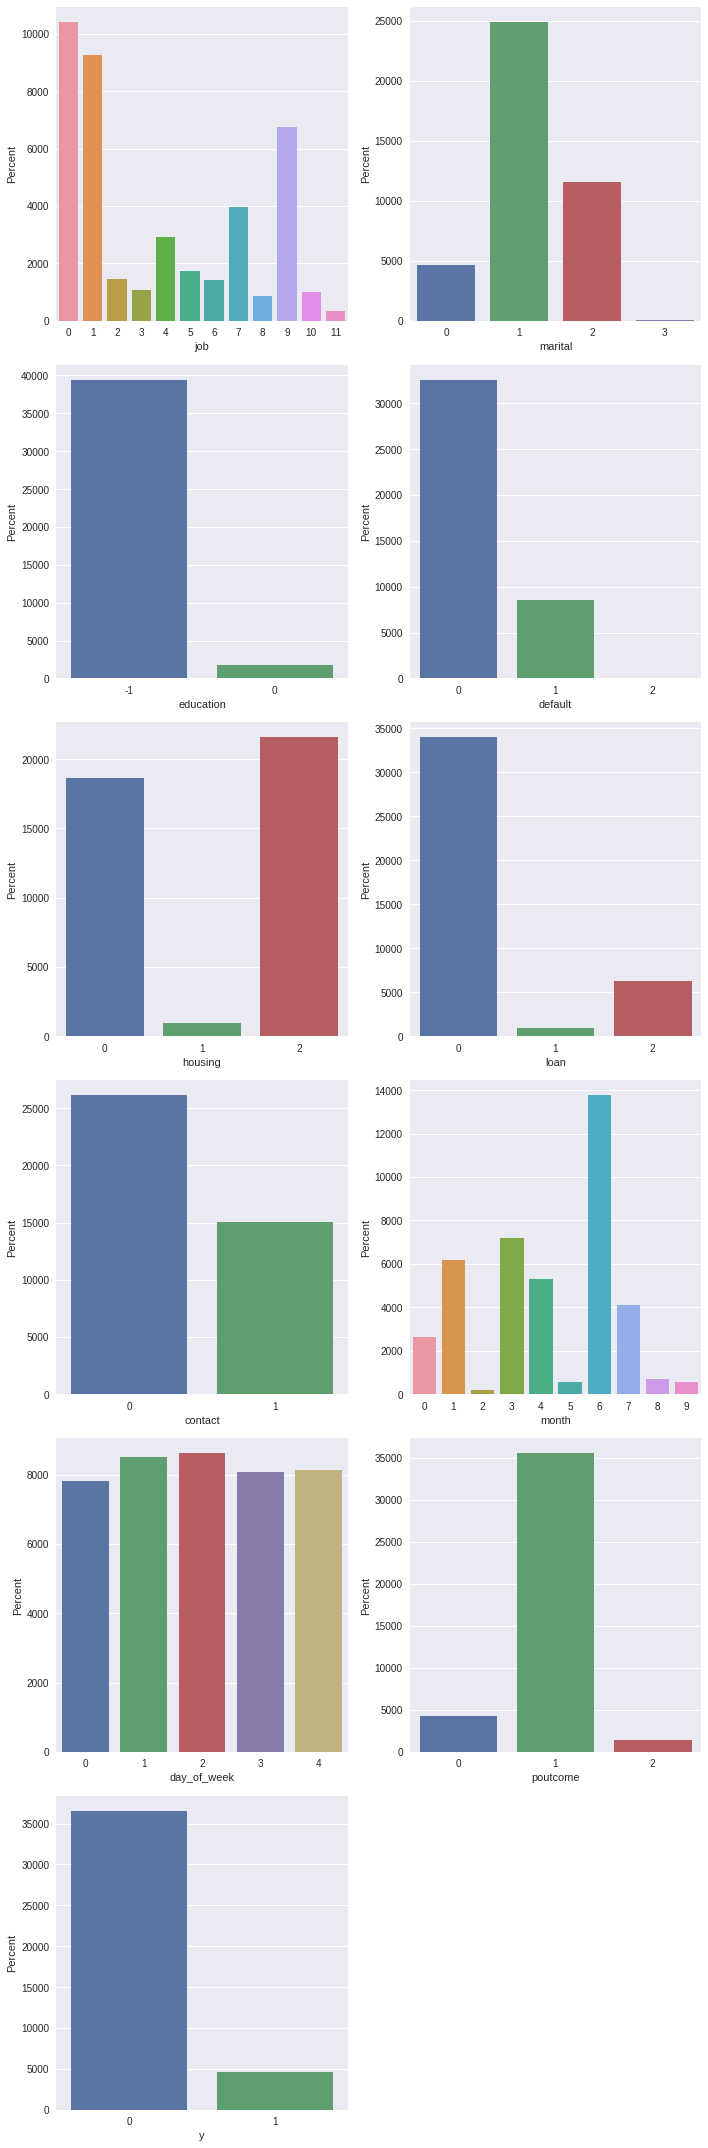

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,30))

for i, col in enumerate(bank_cat.columns):  

    plt.subplot(6, 2, i+1)  
    sns.countplot(x=col,  data=bank)\
         .set(xlabel=col, ylabel='Percent')    
    plt.tight_layout()

plt.show()

plt.clf()
plt.close('all')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(bank.drop('y',axis=1), 
                                                    bank.y, random_state=42, test_size=0.25)

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297 entries, 32884 to 1937
Data columns (total 20 columns):
age               10297 non-null int64
job               10297 non-null int8
marital           10297 non-null int8
education         10297 non-null int8
default           10297 non-null int8
housing           10297 non-null int8
loan              10297 non-null int8
contact           10297 non-null int8
month             10297 non-null int8
day_of_week       10297 non-null int8
duration          10297 non-null int64
campaign          10297 non-null int64
pdays             10297 non-null int64
previous          10297 non-null int64
poutcome          10297 non-null int8
emp.var.rate      10297 non-null float64
cons.price.idx    10297 non-null float64
cons.conf.idx     10297 non-null float64
euribor3m         10297 non-null float64
nr.employed       10297 non-null float64
dtypes: float64(5), int64(5), int8(10)
memory usage: 985.5 KB


In [70]:
!pip install imblearn

    100% |████████████████████████████████| 153kB 4.4MB/s 


In [92]:


X_res



array([[ 5.0000e+01,  1.0000e+00,  1.0000e+00, ..., -4.1800e+01,
         4.8640e+00,  5.2281e+03],
       [ 4.5000e+01,  1.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 2.9000e+01,  0.0000e+00,  2.0000e+00, ..., -3.6100e+01,
         4.9640e+00,  5.2281e+03],
       ...,
       [ 5.4000e+01,  7.0000e+00,  0.0000e+00, ..., -4.9500e+01,
         1.0160e+00,  4.9636e+03],
       [ 3.1000e+01,  1.0000e+00,  1.0000e+00, ..., -4.1800e+01,
         4.9620e+00,  5.2281e+03],
       [ 3.5000e+01,  0.0000e+00,  1.0000e+00, ..., -2.6900e+01,
         7.5400e-01,  5.0175e+03]])

In [99]:
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.ensemble import RandomForestClassifier

rus = RandomUnderSampler(return_indices= True)
X_res, y_res, idx_res = rus.fit_sample(X_train, y_train)

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_res, y_res)

model.score(X_res, y_res)
y_pred = model.predict(X_test)

print(f'Accuracy Score for Test: {accuracy_score(y_test,y_pred)}')
print(f'Recall for test: {recall_score(y_test, y_pred)}')

print(f'Confusion matrix: \n{confusion_matrix(y_test,y_pred)}')
print(f'Area under the curve: {roc_auc_score(y_test, y_pred)}')

Accuracy Score for Test: 0.8640380693405847
Recall for test: 0.8898525585429314
Confusion matrix: 
[[7871 1273]
 [ 127 1026]]
Area under the curve: 0.8753177928322706


In [18]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 6.4MB/s 


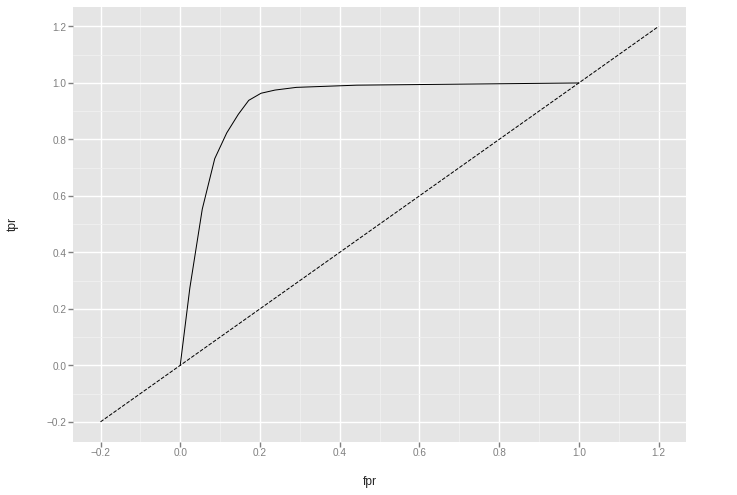

<ggplot: (8749786771937)>

In [21]:
from sklearn import metrics
import pandas as pd
from ggplot import *


preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
geom_line() +\
geom_abline(linetype='dashed')